In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [13]:
# Read the data into a Pandas DataFrame
df = pd.read_excel("./dim_carbon_footprint_country.xlsx")
df = df.drop(["iso", "world_region"], axis=1)
df["carbo_footprint_per_100000"] = df["carbo_footprint"] / 100000
df["total_carbon_footprint_per_100000"] = df["carbo_footprint"] / df["population"] * 100000

# Print the head of the DataFrame
print(df.head())

       country                    region  population  carbo_footprint   
0  Afghanistan  Middle East/Central Asia          30             0.18  \
1   Bangladesh              Asia-Pacific         155             0.26   
2        Benin                    Africa          10             0.51   
3       Bhutan              Asia-Pacific           1             0.63   
4       Brazil             Latin America         199             0.91   

   carbo_footprint_per_100000  total_carbon_footprint_per_100000  
0                    0.000002                         600.000000  
1                    0.000003                         167.741935  
2                    0.000005                        5100.000000  
3                    0.000006                       63000.000000  
4                    0.000009                         457.286432  


<Axes: ylabel='region'>

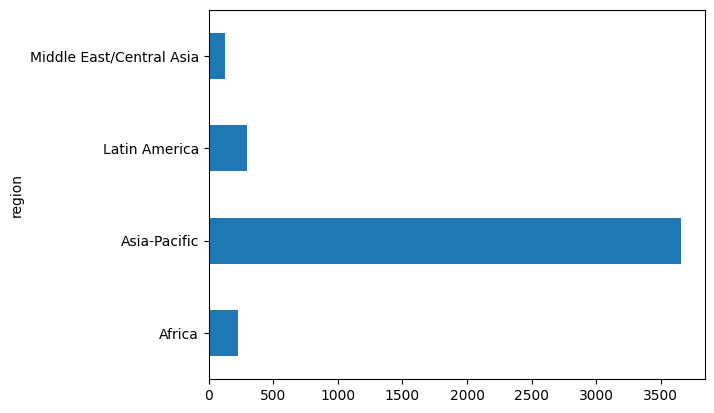

In [9]:
# Calculate the total carbon footprint for each region
df["total_carbon_footprint"] = df["population"] * df["carbo_footprint"]

# Print the total carbon footprint for each region
df.groupby("region")["total_carbon_footprint"].sum().plot(kind="barh")


In [5]:
# Calculate the per capita carbon footprint for each country
df["per_capita_carbon_footprint"] = df["carbo_footprint"] / df["population"]

# Print the per capita carbon footprint for each country
print(df.sort_values("per_capita_carbon_footprint", ascending=False))

                  country         region  population  carbo_footprint   
54  Sao Tome and Principe         Africa           0             0.37  \
64    Trinidad and Tobago  Latin America           1             6.89   
57               Suriname  Latin America           1             3.01   
26                 Guyana  Latin America           1             1.25   
41               Mongolia   Asia-Pacific           3             2.09   
..                    ...            ...         ...              ...   
49                Nigeria         Africa         169             0.21   
10                   Chad         Africa          12             0.01   
19               Ethiopia         Africa          92             0.07   
7                Cambodia   Asia-Pacific          15             0.00   
14               Djibouti         Africa           1             0.00   

    carbo_footprint_per_100000  total_carbon_footprint_per_100000   
54                3.700000e-06                        

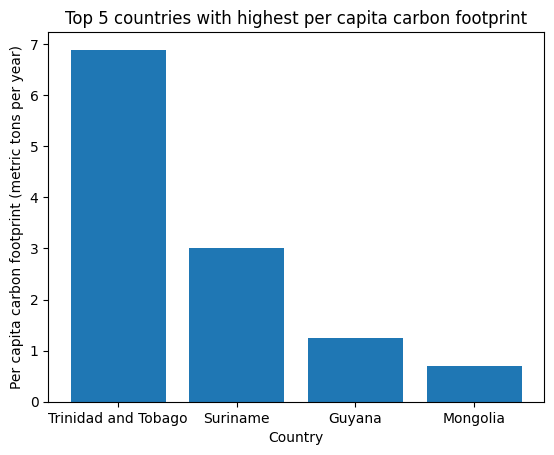

In [11]:
# Sort the DataFrame by per capita carbon footprint
df = df.sort_values("per_capita_carbon_footprint", ascending=False)

# Create a plot of the top 5 countries with highest per capita carbon footprint
plt.figure()
plt.bar(df.head(5)["country"], df.head(5)["per_capita_carbon_footprint"])
plt.xlabel("Country")
plt.ylabel("Per capita carbon footprint (metric tons per year)")
plt.title("Top 5 countries with highest per capita carbon footprint")
plt.show()

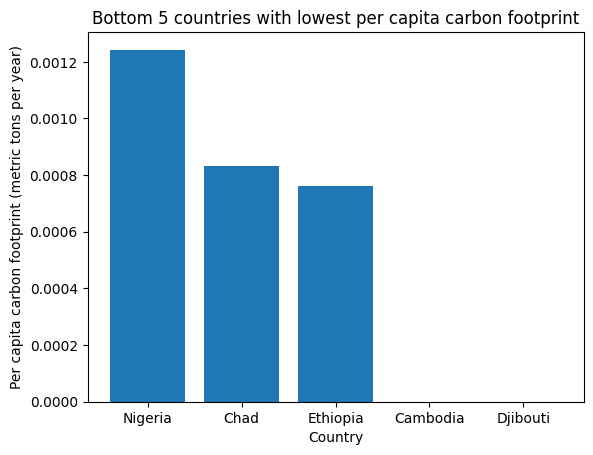

In [12]:
# Create a plot of the bottom 5 countries with lowest per capita carbon footprint
plt.figure()
plt.bar(df.tail(5)["country"], df.tail(5)["per_capita_carbon_footprint"])
plt.xlabel("Country")
plt.ylabel("Per capita carbon footprint (metric tons per year)")
plt.title("Bottom 5 countries with lowest per capita carbon footprint")
plt.show()

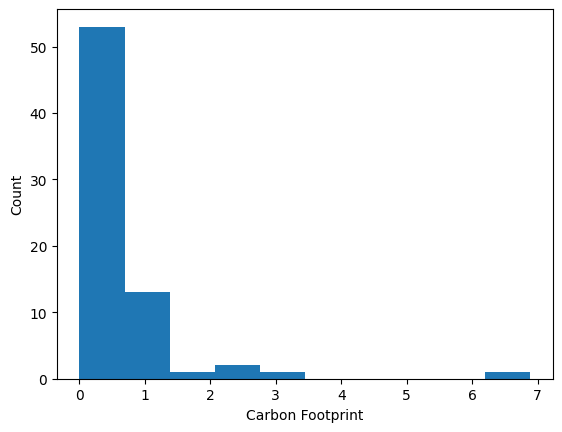

In [15]:
# Create a histogram of the carbon footprint data
plt.hist(df['carbo_footprint'], bins=10)
plt.xlabel('Carbon Footprint')
plt.ylabel('Count')
plt.show()

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

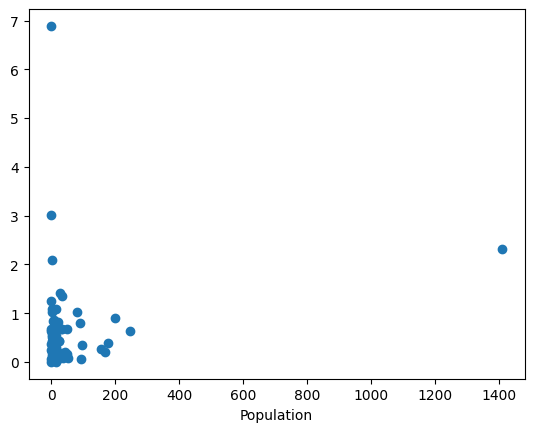

In [16]:
# Create a scatterplot of population vs. carbon footprint
plt.scatter(df['population'], df['carbo_footprint'])
plt.xlabel('Population')
plt.ylabel

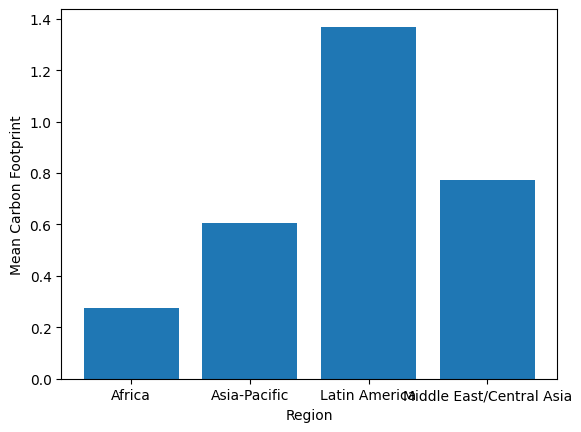

In [19]:
# Group the data by region and calculate the mean carbon footprint for each region
region_means = df.groupby('region')['carbo_footprint'].mean()

# Create a bar chart of the mean carbon footprints by region
plt.bar(region_means.index, region_means.values)
plt.xlabel('Region')
plt.ylabel('Mean Carbon Footprint')
plt.show()

In [ ]:
# Group the data by region and calculate the mean carbon footprint for each region
region_means = df.groupby('region')['carbo_footprint'].mean()

# Create a new column in the dataframe to indicate whether each country's carbon footprint is below or above the regional mean
df['footprint_level'] = df.apply(lambda x: 'below' if x['carbo_footprint'] < region_means[x['region']] else 'above', axis=1)

# Display the updated dataframe
print(df.head())

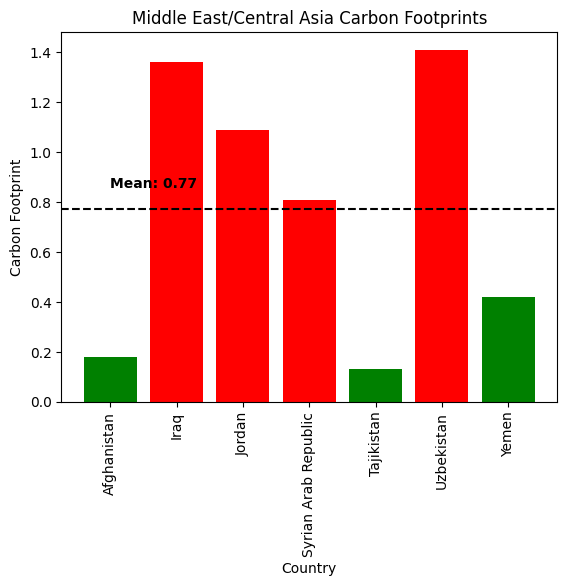

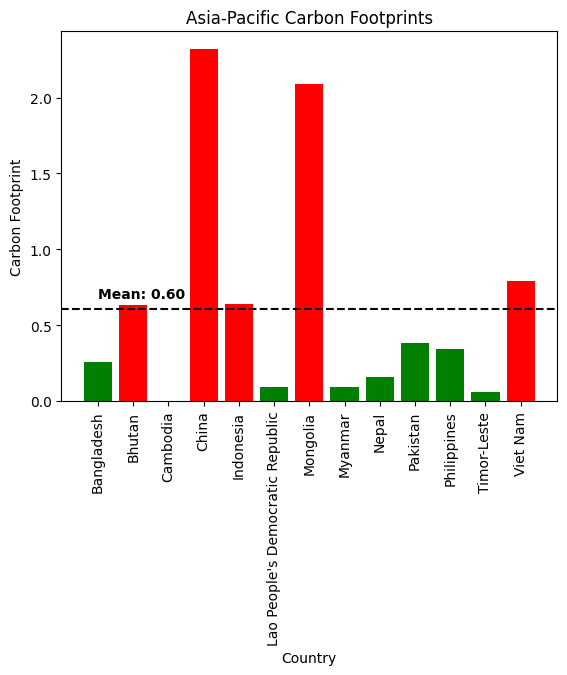

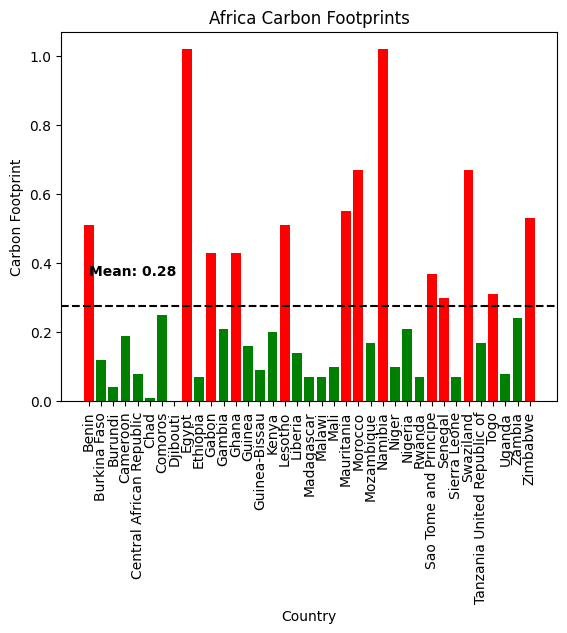

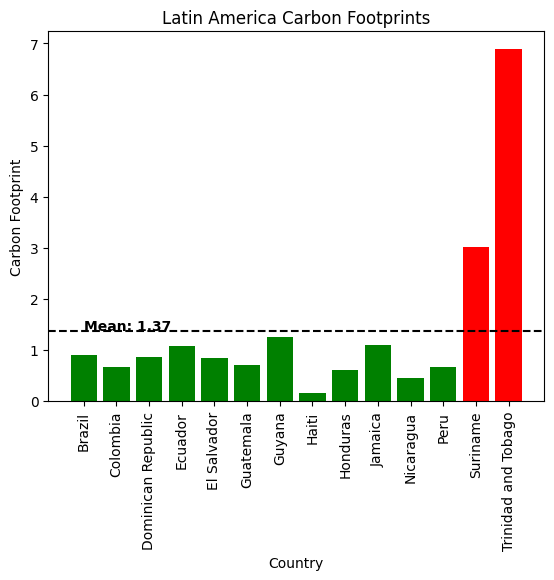

In [24]:
# Group the data by region and calculate the mean carbon footprint for each region
region_means = df.groupby('region')['carbo_footprint'].mean()

# Loop through each region and create a bar plot with color-coded bars for each country
for region in df['region'].unique():
    # Subset the data for the current region
    region_data = df[df['region'] == region]
    
    # Create a list of colors for the bars based on whether each country's carbon footprint is below or above the regional mean
    colors = ['green' if cfp < region_means[region] else 'red' for cfp in region_data['carbo_footprint']]
    
    # Create the bar plot
    plt.bar(region_data['country'], region_data['carbo_footprint'], color=colors)
    plt.xticks(rotation=90)
    plt.title(f"{region} Carbon Footprints")
    plt.xlabel("Country")
    plt.ylabel("Carbon Footprint")
    plt.axhline(y=region_means[region], color='black', linestyle='--')
    plt.text(0, region_means[region]+0.1, f"Mean: {region_means[region]:.2f}", ha='left', va='center', fontweight='bold')
    plt.show()